In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss

from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [2]:
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv("./adult.data", names=names, skipinitialspace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#count and replace the ? entries
for column in df.columns:
    print(column + ": {}".format((df[column] == '?').sum()))
df[df == '?'] = np.nan

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 583
income: 0


/Users/yurihan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [5]:
#drop rows with missing values
print("old len: {}".format(df.shape[0]))
df = df.dropna()
print("new len: {}".format(df.shape[0]))

old len: 32561
new len: 30162


In [6]:
#make the income numerical
df["income"] = df["income"].map({"<=50K":0, ">50K":1})
#drop fnlweight as it is only interesting for the census authorities
df = df.drop(labels="fnlwgt", axis=1)

In [7]:
for column in df.columns:
    print(df[column].value_counts())

36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64
Married-civ-spouse       14065
Never-married             9726
Divo

The cells education and education-num are equal, which means we can drop the non numerical education column.

In [8]:
df = df.drop(labels="education", axis=1)

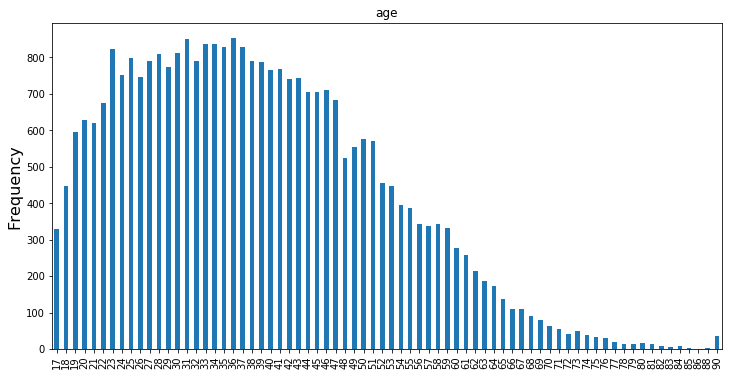

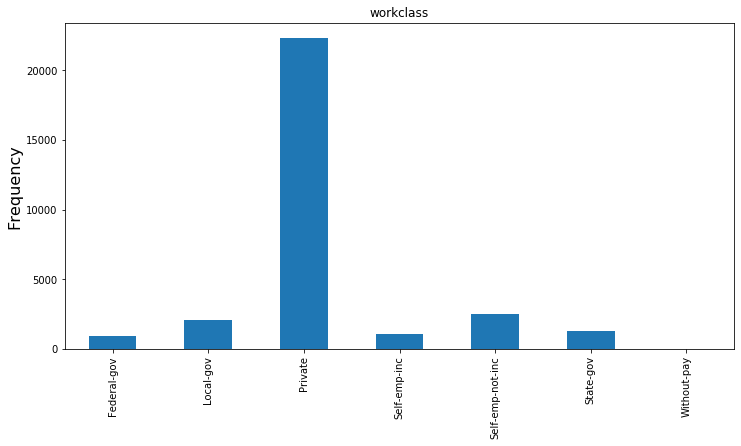

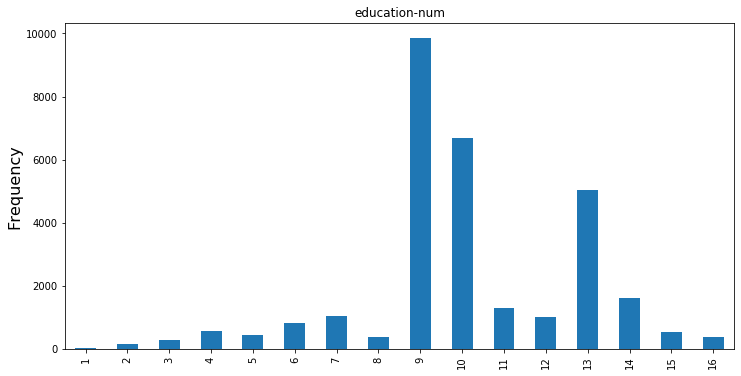

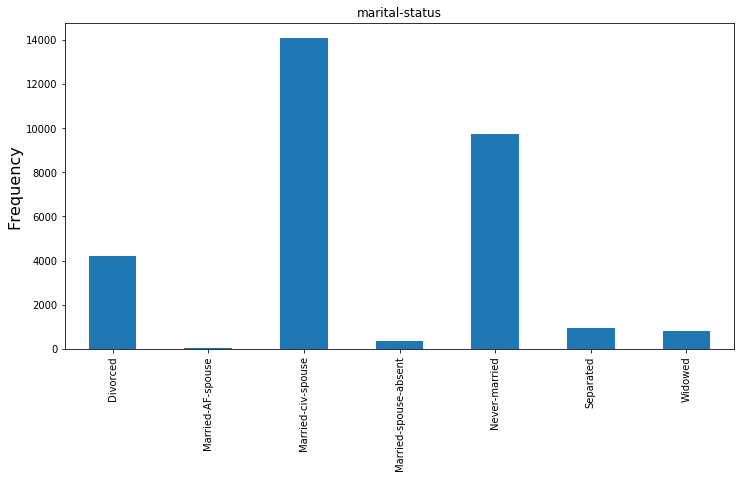

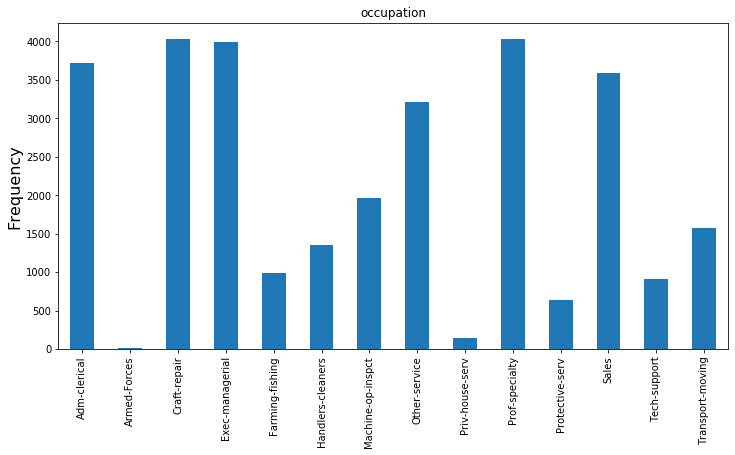

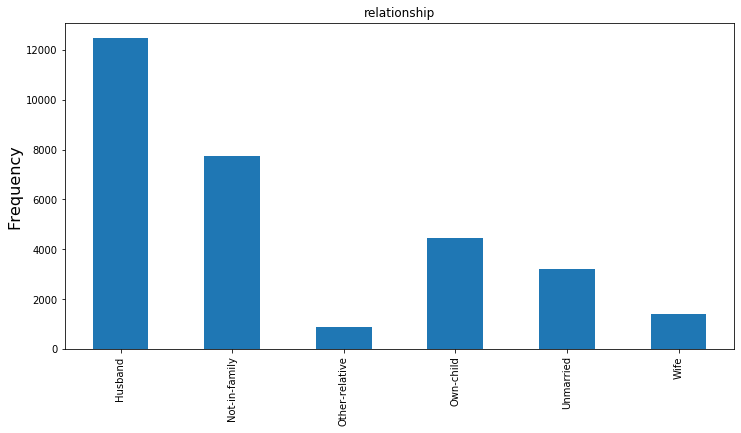

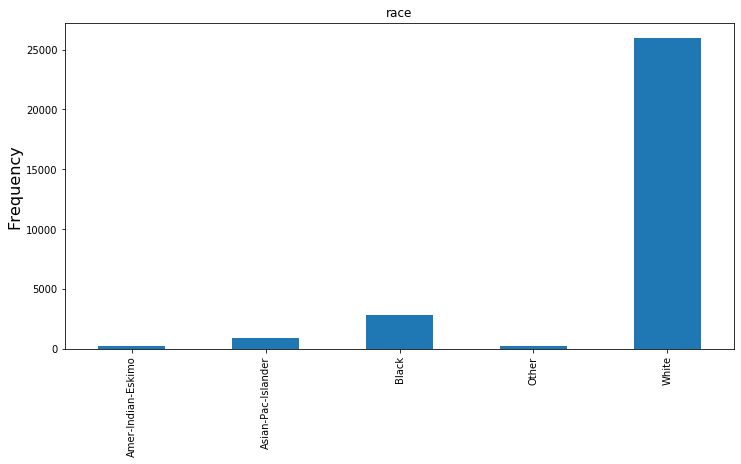

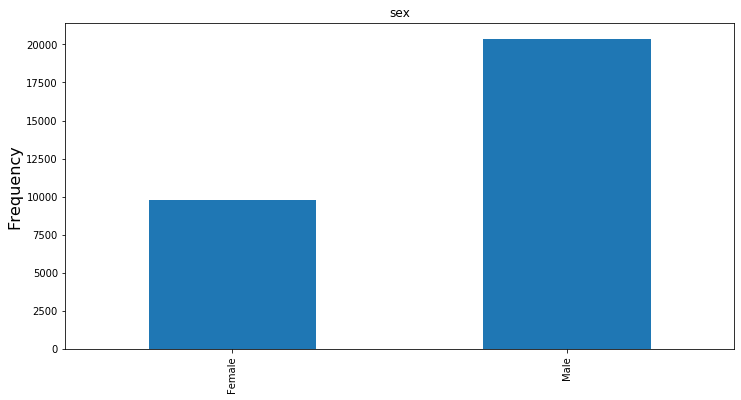

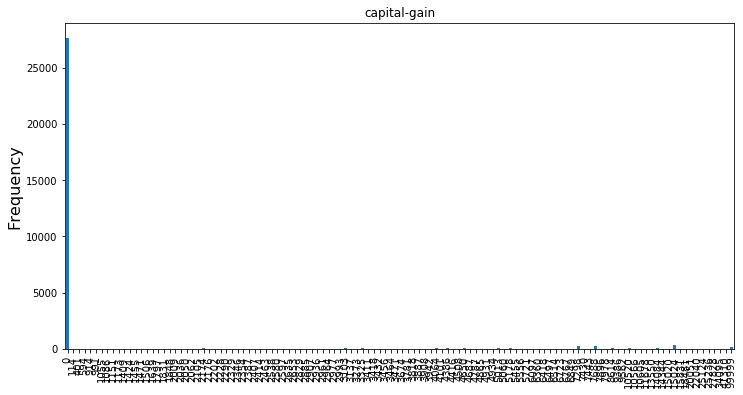

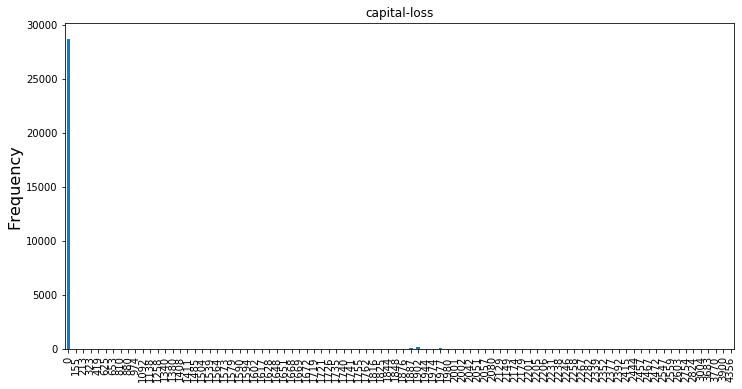

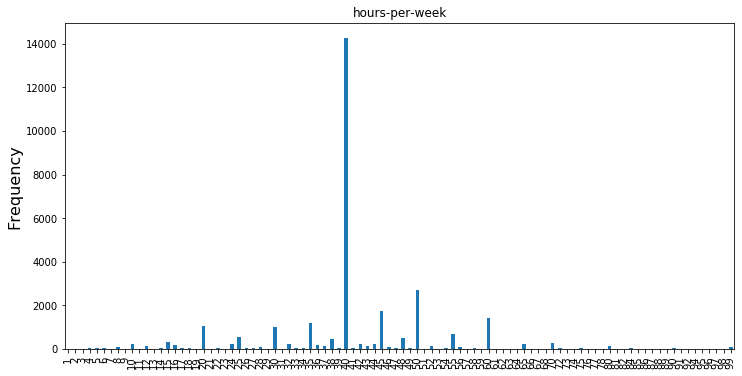

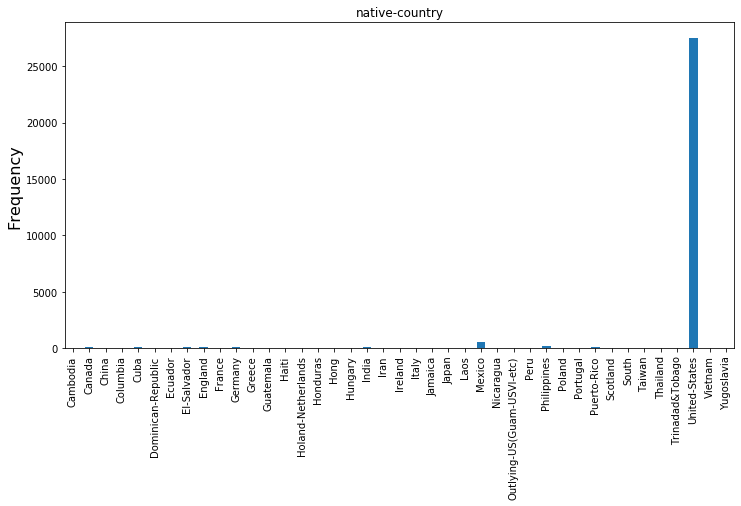

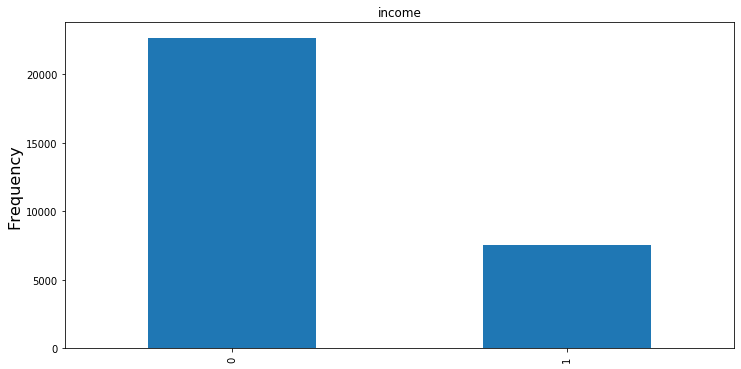

In [9]:
#visualization of each column in frequency
for column in df.columns:
    values = df[column].value_counts().sort_index()
    categories = df[column].unique()
    ax = values.plot.bar(title=column, figsize=(12,6))
    ax.set_ylabel("Frequency", fontsize=16)
    plt.show()

In [10]:
#drop fnlweight as it is only interesting for the census authorities
#df = df.drop(labels="native-country", axis=1)

In [11]:
#split the data for the pca and further processing
from sklearn.model_selection import train_test_split

df_x = df.drop(labels="income", axis=1)
df_y = df["income"]

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=2/10, random_state=0)
print(train_x.shape)
print(test_x.shape)

(24129, 12)
(6033, 12)


In [12]:
#convert the categorical data to numerical
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
features_to_encode = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for feature in features_to_encode:
    train_x[feature] = le.fit_transform(train_x[feature])
    test_x[feature] = le.fit_transform(test_x[feature])

train_x.head()

/Users/yurihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/yurihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
30461,34,2,10,4,0,3,4,1,0,0,40,38
18186,51,2,9,0,2,1,4,1,0,0,40,38
24974,50,2,9,6,9,4,2,0,0,0,40,38
25659,52,4,10,6,2,1,2,1,0,0,35,38
13876,31,2,9,2,6,0,4,1,0,0,40,38


In [13]:
#perform pca to see if we can drop even more columns which might be correlated. 
#martial status and relationship seem pretty similar to begin with
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#use labelencoder to encode the string labels to int


#scales the data to the standard normal, as is required for pca of sklearn
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

pca = PCA(.90)
pca.fit(train_x)

train_x = pca.transform(train_x)
test_x = pca.transform(test_x)
print(train_x.shape)

(24129, 10)


In [14]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [17]:
# SVC
# train_x, test_x, train_y, test_y
model = SVC()
model.fit(train_x, train_y)
y_hat = model.predict(test_x)
print(log_loss(test_y, y_hat))

print(accuracy_score(test_y, y_hat))

5.770808040151278
0.8329189457981104


In [18]:
# MLP
model = MLPClassifier(learning_rate="invscaling")
model.fit(train_x, train_y)
y_hat = model.predict(test_x)
print(log_loss(test_y, y_hat))

print(accuracy_score(test_y, y_hat))

5.204042635736404
0.8493286921929388


/Users/yurihan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
